# Week 3 Review

### basic numpy manipulation

Write two ways to get the diagonal elements of a dot product of two matrices, A and B.

In [118]:
A = np.arange(25).reshape(5,5)
B = np.arange(25).reshape(5,5)

print np.diag(np.dot(A, B))
print np.sum(A * B.T, axis=1)  # what does this do?

[ 150  435  770 1155 1590]
[ 150  435  770 1155 1590]


Given some matrix (row normalized to 1.0):

```python
 P = [[ 0.30434783  0.34782609  0.34782609]
     [ 0.08333333  0.25        0.66666667]
     [ 0.75        0.16666667  0.08333333]]
 ```

Find the stationary distribution.

In [123]:
P = np.array([[ 0.30434783, 0.34782609, 0.34782609],[0.08333333,  0.25, 0.66666667], [ 0.75, 0.16666667,  0.08333333]])

In [132]:
def raise_nth_power(n, transition):
    ''' Solve for stationary distribution by raising to the nth power '''
    
    temp = transition
    for i in np.arange(n-1):    
        temp = transition.dot(temp)
    
    return temp

In [133]:
n = 4
print raise_nth_power(n,P)

[[ 0.39499623  0.26277315  0.34223064]
 [ 0.39609814  0.25751295  0.34638892]
 [ 0.40479273  0.26041049  0.3347968 ]]


In [115]:
# how to run a linear regression using scikit learn. See week 3 notebook for example.

Week 4 - Strings
====

<ul>
<li>Text analysis is a *huge* part of data analysis - its not just numbers
<li>Need to standardize variables, resolve ambiguoous labels
<li>Converting text to numeric representations (word bagging, n-grams) is common
</ul>

## Today

1. [Tweet example](#tweet)
2. [string modules](#modules)
<ol>
<li>os
<li>collections
</ol>
3. [Regular Expressions](#regex)
4. [Review Problems](#hmwk)

### And if there is time - either more Regression or intro Pandas

Sentiment analysis on Obama's tweets<a id="tweet"></a>
====

<ul>
<li>One of Python’s strengths is the ease of working with text
</ul>

In [1]:
import urllib     # popular module for fetching data from web

In [ ]:
files = ['positive.txt','obama_tweets.txt']     # create list of filenames
path = 'http://www.unc.edu/~ncaren/haphazard/'   # this URL has good text documents to practice on

for file_name in files:
     urllib.urlretrieve(path + file_name,file_name)    # pull down text data from URL

In [2]:
tweet_file = open("obama_tweets.txt").read()
tweet_file[:1000]

'Obama has called the GOP budget social Darwinism. Nice try, but they believe in social creationism.\nIn his teen years, Obama has been known to use marijuana and cocaine.\nIPA Congratulates President Barack Obama for Leadership Regarding JOBS Act: WASHINGTON, Apr 05, 2012 (BUSINESS W... http://t.co/8le3DC8E\nRT @Professor_Why: #WhatsRomneyHiding - his connection to supporters of Critical Race Theory.... Oh wait, that was Obama, not Romney...\nRT @wardollarshome: Obama has approved more targeted assassinations than any modern US prez; READ & RT: http://t.co/bfC4gbBW\nVideo shows federal officials joking about cost of lavish conference http://t.co/2i4SmoPM #obama #crime #p2 #news #tcot #teaparty\none Chicago kid who says "Obama is my man" tells Jesse Watters that the gun violence in Chicago is like "World War 17"\nRT @ohgirlphrase: American kid "You\'re from the UK? Ohhh cool, So do you have tea with the Queen?". British kid: "Do you like, go to Mcdonalds with Obama?\nA valid explanatio

## How can we get a handle on all this text?

### String methods

<ul>
<li>`Split` a string according to some character. This creates a list of strings out of the original string.
<li>`Join` a list of strings together according to some delimiter     
<li>`Strip` leading and trailing blanks around a word  
<li>`count` the number of exact matches
<li>`find` the index of first occurrence. `-1` if doesn't exist
<li>`replace` replaces every occurrence of one pattern with another
</ul>

In [3]:
tweets = tweet_file.split('\n')   # very commonly used
tweets[:10]

['Obama has called the GOP budget social Darwinism. Nice try, but they believe in social creationism.',
 'In his teen years, Obama has been known to use marijuana and cocaine.',
 'IPA Congratulates President Barack Obama for Leadership Regarding JOBS Act: WASHINGTON, Apr 05, 2012 (BUSINESS W... http://t.co/8le3DC8E',
 'RT @Professor_Why: #WhatsRomneyHiding - his connection to supporters of Critical Race Theory.... Oh wait, that was Obama, not Romney...',
 'RT @wardollarshome: Obama has approved more targeted assassinations than any modern US prez; READ & RT: http://t.co/bfC4gbBW',
 'Video shows federal officials joking about cost of lavish conference http://t.co/2i4SmoPM #obama #crime #p2 #news #tcot #teaparty',
 'one Chicago kid who says "Obama is my man" tells Jesse Watters that the gun violence in Chicago is like "World War 17"',
 'RT @ohgirlphrase: American kid "You\'re from the UK? Ohhh cool, So do you have tea with the Queen?". British kid: "Do you like, go to Mcdonalds with Obam

In [4]:
print len(tweets)
tweets[:5]

1365


['Obama has called the GOP budget social Darwinism. Nice try, but they believe in social creationism.',
 'In his teen years, Obama has been known to use marijuana and cocaine.',
 'IPA Congratulates President Barack Obama for Leadership Regarding JOBS Act: WASHINGTON, Apr 05, 2012 (BUSINESS W... http://t.co/8le3DC8E',
 'RT @Professor_Why: #WhatsRomneyHiding - his connection to supporters of Critical Race Theory.... Oh wait, that was Obama, not Romney...',
 'RT @wardollarshome: Obama has approved more targeted assassinations than any modern US prez; READ & RT: http://t.co/bfC4gbBW']

In [5]:
# Average number of hashtags total?
# I hope you remember your list comprehensions :)

sum([tweet.count('#') for tweet in tweets])/len(tweets)      # exact matching pattern

0

In [6]:
print tweets[300]
print tweets[300].find('a')  # only first occurrence
print tweets[300].find('!')  # -1 if doesn't occur

White House in damage control over Obama Supreme Court remarks: The White House was forced on the defensive on W... http://t.co/2Yy8Srct
16
-1


In [7]:
# Number of tweets with no #?

sum([tweet.find('#') == -1  for tweet in tweets])       

896

In [8]:
tweets[300].replace('Obama', "Trump")

'White House in damage control over Trump Supreme Court remarks: The White House was forced on the defensive on W... http://t.co/2Yy8Srct'

### Basic string manipulation - example

Pull out the `methods` from the markdown text below:

objective = "Basic string manipulation"

<ul>
  <li>`Split` a string according to some character. This creates a list of strings out of the original string.
  <li>`Join` a list of strings together according to some delimiter     
  <li>`Strip` leading and trailing blanks around a word  
  <li>`count` the number of exact matches
  <li>`find` the index of first occurrence. `-1` if doesn't exist
  <li>`replace` replaces every occurrence of one pattern with another
</ul>

In [9]:
objective = "Basic string manipulation"

s = """
<ul>
  <li>`Split` a string according to some character. This creates a list of strings out of the original string.
  <li>`Join` a list of strings together according to some delimiter     
  <li>`Strip` leading and trailing blanks around a word  
  <li>`count` the number of exact matches
  <li>`find` the index of first occurrence. `-1` if doesn't exist
  <li>`replace` replaces every occurrence of one pattern with another
</ul>
"""
print s     # where's the newline characters?


<ul>
  <li>`Split` a string according to some character. This creates a list of strings out of the original string.
  <li>`Join` a list of strings together according to some delimiter     
  <li>`Strip` leading and trailing blanks around a word  
  <li>`count` the number of exact matches
  <li>`find` the index of first occurrence. `-1` if doesn't exist
  <li>`replace` replaces every occurrence of one pattern with another
</ul>



In [10]:
split_list = [i for i in s.split('\n')]
split_list

['',
 '<ul>',
 '  <li>`Split` a string according to some character. This creates a list of strings out of the original string.',
 '  <li>`Join` a list of strings together according to some delimiter     ',
 '  <li>`Strip` leading and trailing blanks around a word  ',
 '  <li>`count` the number of exact matches',
 "  <li>`find` the index of first occurrence. `-1` if doesn't exist",
 '  <li>`replace` replaces every occurrence of one pattern with another',
 '</ul>',
 '']

In [11]:
strip_list = [i.strip('   <li>') for i in split_list[2:-2]] # remove trailing space and markdown characters
strip_list

# should remove first two and last two

['`Split` a string according to some character. This creates a list of strings out of the original string.',
 '`Join` a list of strings together according to some delimiter',
 '`Strip` leading and trailing blanks around a word',
 '`count` the number of exact matches',
 "`find` the index of first occurrence. `-1` if doesn't exist",
 '`replace` replaces every occurrence of one pattern with another']

In [12]:
tokenize = [i.split(' ') for i in strip_list]
print tokenize

[['`Split`', 'a', 'string', 'according', 'to', 'some', 'character.', 'This', 'creates', 'a', 'list', 'of', 'strings', 'out', 'of', 'the', 'original', 'string.'], ['`Join`', 'a', 'list', 'of', 'strings', 'together', 'according', 'to', 'some', 'delimiter'], ['`Strip`', 'leading', 'and', 'trailing', 'blanks', 'around', 'a', 'word'], ['`count`', 'the', 'number', 'of', 'exact', 'matches'], ['`find`', 'the', 'index', 'of', 'first', 'occurrence.', '`-1`', 'if', "doesn't", 'exist'], ['`replace`', 'replaces', 'every', 'occurrence', 'of', 'one', 'pattern', 'with', 'another']]


In [13]:
final_words = [i[0].strip('`') for i in tokenize]
final_words

['Split', 'Join', 'Strip', 'count', 'find', 'replace']

In [14]:
" + ".join(final_words) + " = {}".format(objective)

'Split + Join + Strip + count + find + replace = Basic string manipulation'

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## EXERCISE TIME!

Format your `PATH` variable such that it looks like this:

```
=> bin=> sh
=> Users=> ilanman=> sparkapphelper=> scala-2.11.7=> bin=> bin
=> Users=> ilanman=> sparkapphelper=> spark=> spark-1.6.0-bin-hadoop2.6=> bin
=> Users=> ilanman=> sparkapphelper=> sbt=> sbt-0.13.11=> bin
=> Library=> Java=> JavaVirtualMachines=> jdk1.8.0_60.jdk=> Contents=> Home=> bin
=> usr=> local=> bin
=> usr=> bin
=> bin
=> usr=> sbin
=> sbin
=> opt=> X11=> bin
=> Library=> TeX=> texbin
No such file or directory
```

Note that Jupyter can access your terminal by entering `!` before regular terminal commands, i.e. `!mkdir newfolder`<br>

Here is my current `PATH`: `!echo $PATH`

`/Users/ilanman/spark/bin:/Users/ilanman/sbt/bin:/Library/Java/JavaVirtualMachines/jdk1.8.0_60.jdk/Contents/Home/bin`<br>
`/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/opt/X11/bin:/Library/TeX/texbin`

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Assess positive or negative sentiment

In [15]:
positive_file = open("positive.txt").read()
positive_file[:1000]

'abidance\nabidance\nabilities\nability\nable\nabove\nabove-average\nabundant\nabundance\nacceptance\nacceptable\naccessible\nacclaim\nacclaimed\naccolade\naccolades\naccommodative\naccomplishment\naccomplishments\naccordance\naccordantly\naccurate\naccurately\nachievable\nachievement\nachievements\nacknowledgement\nactive\nacumen\nadaptable\nadaptability\nadaptive\nadept\nadeptly\nadequate\nadherence\nadherent\nadhesion\nadmirable\nadmirer\nadmirable\nadmirably\nadmiration\nadmiring\nadmiringly\nadmission\nadmission\nadorable\nadored\nadorer\nadoring\nadoringly\nadroit\nadroitly\nadulatory\nadvanced\nadvantage\nadvantage\nadvantageous\nadvantages\nadvantages\nadventure\nadventure\nadventuresome\nadventurism\nadventurous\nadvice\nadvice\nadvisable\nadvocacy\naffable\naffability\naffably\naffection\naffection\naffectionate\naffinity\naffirmation\naffirmation\naffirmative\naffluent\naffluence\naffordable\nafloat\nagile\nagilely\nagility\nagreeable\nagreement\nagreement\nallowable\nallure

In [16]:
positive_file.split('\n')[:10]

['abidance',
 'abidance',
 'abilities',
 'ability',
 'able',
 'above',
 'above-average',
 'abundant',
 'abundance',
 'acceptance']

## What's the positive sentiment in the tweets?

<ul>
<li>Iterate through tweets and count occurrence of positive words. 
<li>Need to do a bit a cleaning first.
</ul>

In [17]:
tweets[0]

'Obama has called the GOP budget social Darwinism. Nice try, but they believe in social creationism.'

In [18]:
# The punctuation function is useful for getting rid of unwanted characters in a string
from string import punctuation
print punctuation

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


## os module

<ul>
<li>`os` module provides a way of using operating system dependent functionality. You can find important information about your location or about the process.
<li>We'll look at this in more detail next session
</ul>

In [19]:
import os

print os.getcwd()

/Users/ilanman/gdi/week4


In [20]:
# Alice in Wonderland from Project Gutenberg

if not os.path.exists('alice.txt'):
    ! curl http://www.gutenberg.org/cache/epub/11/pg11.txt -O alice.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  163k  100  163k    0     0   247k      0 --:--:-- --:--:-- --:--:--  247k
<html>
<head><title>301 Moved Permanently</title></head>
<body bgcolor="white">
<center><h1>301 Moved Permanently</h1></center>
<hr><center>nginx</center>
</body>
</html>


In [21]:
!head -50 pg11.txt

## collections modules

<ul>
<li>Very useful module for text manipulation, analysis. Lots of iterating over dictionary-like objects.
<li>`OrderedDict`
<li>`defaultdict`
<li>`namedtuple`
<li>`Counter`
</ul>

In [22]:
alice = open('pg11.txt').read()  # read in file

# split words on spaces, remove punctuation and make lower case
words = alice.translate(None, punctuation).lower().split()    # common to chain together string methods

In [23]:
print len(words)
print len(set(words))   # set - unique elements

29386
3251


## Digression on Sets

<ul>
<li>Another python data type
<li>Can use `{some_sequence}` or `set(some_list)` to create it
<li>Like lists or tuples, but returns **unique** elements. This can be super handy.
<li>Has a specific way of thinking about it
<li>`add`, `intersection`, `union`
</ul>

In [24]:
x = [1,2,3,2,1,2,3,4,5,6,7,6,5,4,3,3]  # some list
set(x)

{1, 2, 3, 4, 5, 6, 7}

In [25]:
y = {1,2,3,2,1,2,3,4,5,6,7,6,5,4,3,3}
y

{1, 2, 3, 4, 5, 6, 7}

In [26]:
set(['this is a sentence'])

{'this is a sentence'}

In [27]:
set('this is a sentence')

{' ', 'a', 'c', 'e', 'h', 'i', 'n', 's', 't'}

In [28]:
a = [1,2,3,4,5]
b = [3,4,5,6,7]
set(a).intersection(set(b))

{3, 4, 5}

In [29]:
set(a).union(set(b))

{1, 2, 3, 4, 5, 6, 7}

In [30]:
set(a).difference(set(b))   # a - b

{1, 2}

### How to find 10 most common words?

In [31]:
most_common = {}

# use set to find unique words, store in dictionary
for word in set(words):
    most_common.update({word : words.count(word)})     # WHAT DOES UPDATE DO?

In [32]:
most_common

{'secondly': 2,
 'pardon': 6,
 'limited': 5,
 'copy': 12,
 'saves': 1,
 'bear': 1,
 'knelt': 1,
 'four': 6,
 'sleep': 6,
 'hanging': 3,
 'ringlets': 2,
 'oldest': 1,
 'hate': 1,
 'assembled': 2,
 'consider': 4,
 'whose': 2,
 'lory': 7,
 'calculate': 1,
 'paris': 2,
 'blacking': 1,
 'presents': 2,
 'yetits': 1,
 'certain': 5,
 'whatsoever': 2,
 'under': 22,
 'inwards': 1,
 'sorry': 1,
 'glovesthat': 1,
 'worth': 4,
 'updated': 2,
 'void': 1,
 'rise': 1,
 'every': 12,
 'govern': 1,
 'month': 2,
 'fireplace': 1,
 'school': 5,
 'prize': 1,
 'wooden': 1,
 'pinch': 2,
 'persisted': 2,
 'drawlingthe': 1,
 'wept': 1,
 'favoured': 1,
 'leaders': 1,
 'farmyardwhile': 1,
 'tired': 7,
 'feathers': 1,
 'direct': 1,
 'elegant': 1,
 'likely': 5,
 'louder': 1,
 'machines': 1,
 'shining': 1,
 'even': 21,
 'meekly': 2,
 'errors': 1,
 'hide': 1,
 'forgetting': 3,
 'solemn': 3,
 'thunder': 1,
 'near': 15,
 'poison': 3,
 'above': 3,
 'conduct': 1,
 'new': 8,
 'babythe': 1,
 'increasing': 1,
 'asis': 1,
 't

### To find top 10, need to sort dictionary on values. There are <em>MANY</em> ways to do this.

In [33]:
# using base python

sorted_words_lambda = sorted(most_common.items(), key = lambda x: x[1], reverse = True)
sorted_words_lambda[:10]

[('the', 1804),
 ('and', 912),
 ('to', 801),
 ('a', 684),
 ('of', 625),
 ('it', 541),
 ('she', 538),
 ('said', 462),
 ('you', 429),
 ('in', 428)]

In [34]:
# using itemgetter from operator module
from operator import itemgetter

sorted_words_itemgetter = sorted(most_common.items(), key = itemgetter(1), reverse = True)
sorted_words_itemgetter[:10]

[('the', 1804),
 ('and', 912),
 ('to', 801),
 ('a', 684),
 ('of', 625),
 ('it', 541),
 ('she', 538),
 ('said', 462),
 ('you', 429),
 ('in', 428)]

In [35]:
# using collections module
from collections import OrderedDict

sorted_words_collections = OrderedDict(sorted(most_common.items(), key = lambda x: x[1], reverse = True))
sorted_words_collections.items()[:10]

[('the', 1804),
 ('and', 912),
 ('to', 801),
 ('a', 684),
 ('of', 625),
 ('it', 541),
 ('she', 538),
 ('said', 462),
 ('you', 429),
 ('in', 428)]

In [36]:
# default dict

from collections import defaultdict
inverse = defaultdict( list )

for k, v in most_common.items():
    inverse[v].append( k )

for k in sorted(inverse,reverse=True)[:10]:
    print inverse[k][0], k

the 1804
and 912
to 801
a 684
of 625
it 541
she 538
said 462
you 429
in 428


In [37]:
# named tuple

from collections import namedtuple

sorted_words_named = namedtuple('word', 'word count')
sorted_words_named = sorted([sorted_words_named(v,k) for (k,v) in most_common.items()], reverse=True)
sorted_words_named[:10]

[word(word=1804, count='the'),
 word(word=912, count='and'),
 word(word=801, count='to'),
 word(word=684, count='a'),
 word(word=625, count='of'),
 word(word=541, count='it'),
 word(word=538, count='she'),
 word(word=462, count='said'),
 word(word=429, count='you'),
 word(word=428, count='in')]

In [38]:
# using Counter

from collections import Counter

sorted_words_counter = [item for item in Counter(words).most_common(10)]
sorted_words_counter[:10]

[('the', 1804),
 ('and', 912),
 ('to', 801),
 ('a', 684),
 ('of', 625),
 ('it', 541),
 ('she', 538),
 ('said', 462),
 ('you', 429),
 ('in', 428)]

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## EXERCISE TIME!

Find the number of words that appear exactly 10 times in the book. Use a python module.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Find positive sentiment from tweets

<ul>
<li>Helpful to standardize tweets
<li>Convert to lower case
<li>Remove punctuation
</ul>

In [39]:
positive_word_dict = {}

positives = positive_file.split('\n')[::-1][1:]

for tweet in tweets:   # for all tweets
    for positive_word in positives:   # for all positive words
        if positive_word in tweet.translate(None, punctuation).lower():   # if positive word in tweet
            positive_word_dict[positive_word] = positive_word_dict.get(positive_word, 0)  # WHAT DOES GET DO?
            positive_word_dict[positive_word] += 1

In [40]:
sorted(positive_word_dict.items())[:10]

[('ability', 2),
 ('able', 14),
 ('accomplishment', 1),
 ('accomplishments', 1),
 ('active', 4),
 ('advantage', 10),
 ('agreement', 10),
 ('amazing', 1),
 ('ample', 1),
 ('angel', 2)]

## Find the most common positive word used in the tweets

In [41]:
[item for item in Counter(positive_word_dict).most_common(1)]

[('just', 174)]

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## EXERCISE TIME!

Do a similar analysis above but using negative words. 

1) Read in the `negative.txt` file and store it in a variable call it `negative`.<br>
2) Using `negative`, find the 10 most common negative words in the tweets. Comment on any interesting observations.<br>
3) For the most common negative word, print 10 tweets that contain it. Comment on any interesting observations.


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## What happened??

Regular Expression <a id="regex"></a>
-----

<ul>
<li>Special sequence of characters that helps you match (**exact!**) or find other strings or sets of strings, using a specialized syntax held in a pattern
<li>Regular expressions as a concept is not exclusive to Python at all.
<li>Regular expressions are widely used in UNIX world.
<li>`re` module
        <ul>
        <li>`re.compile()`
        <li>`re.match()`
        <li>`re.search()`
        <li>`re.findall()`
        <li>`re.sub()`
        </ul>
<li>In python, regular expressions tend to be **very slow**. So only use if necessary.
</ul>

In [42]:
from re import match, search, findall, compile, sub

In [43]:
# python treats / as an escape character. So "/n" is a newline object, not a literal '/n'
# to de-pythonify a string, add r' to the front - this makes it a raw string

string = 'This is a\nnormal string with a newline and \ttab character'
rawString = r'and this is a\nraw string which can be used to search for \tpatterns'
print string
print "+++++++++++++++++"
print rawString

This is a
normal string with a newline and 	tab character
+++++++++++++++++
and this is a\nraw string which can be used to search for \tpatterns


#### `match` - only find matches if they occur at the start of the string being searched.

In [44]:
test_string = "I'm learning about regular expressions and about how to use them in Python. This is fantastic stuff!"

In [45]:
match_pattern = match("I'm", test_string) # return pattern matched by query
print match_pattern
print match_pattern.group()

I'm


In [46]:
print match("about", test_string)

None


#### `search` - similar to `match`, but `search` doesn’t restrict us to only finding matches at the beginning of the string. But will only return the first result

In [47]:
search_pattern = search('about', test_string)
print search_pattern
search_pattern.group()

'about'

#### `findall` - get a list of all matching patterns

In [48]:
findall('about',test_string)

['about', 'about']

In [49]:
findall('an',test_string)  # no good

['an', 'an']

In [50]:
findall(' an ',test_string)  # kinda hacky

[]

In [51]:
word = 'about'
findall(r'\b' + word + r'\b', test_string)  # better

['about', 'about']

In [52]:
word = 'about'
test_string.count(word)  # count() is ok for simple searches

2

#### Use `compile` to create regular expressions that you can then `search`, `findall`, `match`, ...

In [53]:
word = 'about'
expr = compile(r'\b' + word + r'\b')  # can get complex
print findall(expr, test_string)

['about', 'about']


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## EXERCISE TIME!

Redo the negative tweet exercise from above to perform exact matching. That is:<br>

1) Using negative, find the 10 most common negative words in the tweets. Comment on any interesting observations.<br>
2) For the most common negative word, print 10 tweets that contain it. Comment on any interesting observations.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# What is the distribution of negative word occurrence?

**Let's plot it!**

In [75]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
common_words = Counter(positive_word_dict).most_common(40)
common_words

[('just', 174),
 ('will', 134),
 ('pro', 108),
 ('right', 76),
 ('support', 64),
 ('star', 62),
 ('real', 56),
 ('respect', 52),
 ('interest', 46),
 ('bull', 44),
 ('hug', 44),
 ('gain', 43),
 ('fun', 42),
 ('friend', 38),
 ('white', 38),
 ('well', 34),
 ('slim', 32),
 ('supreme', 32),
 ('hope', 30),
 ('ease', 29),
 ('top', 27),
 ('important', 26),
 ('master', 24),
 ('hot', 21),
 ('favor', 18),
 ('good', 18),
 ('lean', 18),
 ('praising', 18),
 ('nice', 17),
 ('supporter', 16),
 ('even', 16),
 ('promise', 16),
 ('security', 16),
 ('sure', 16),
 ('live', 15),
 ('justice', 14),
 ('progress', 14),
 ('love', 14),
 ('rights', 14),
 ('chic', 14)]

In [77]:
ys = [i[1] for i in common_words]   # number of occurrences
xs = [i[0] for i in common_words]   # words

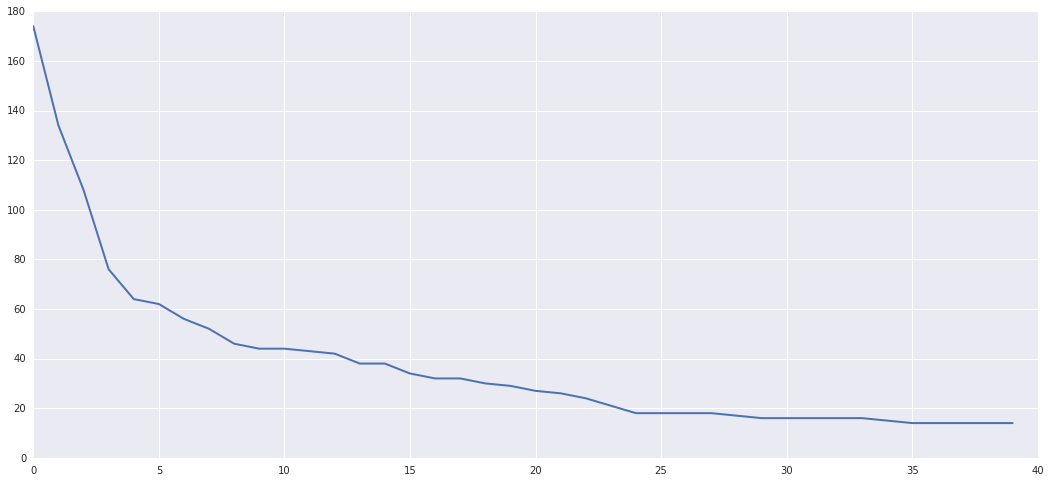

In [78]:
plt.figure(figsize=(18,8))  # set the canvas size
plt.plot(ys, linewidth = 2)    # call a line plt
pass

In [79]:
import seaborn as sns   # let's use seaborn in our plotting environment

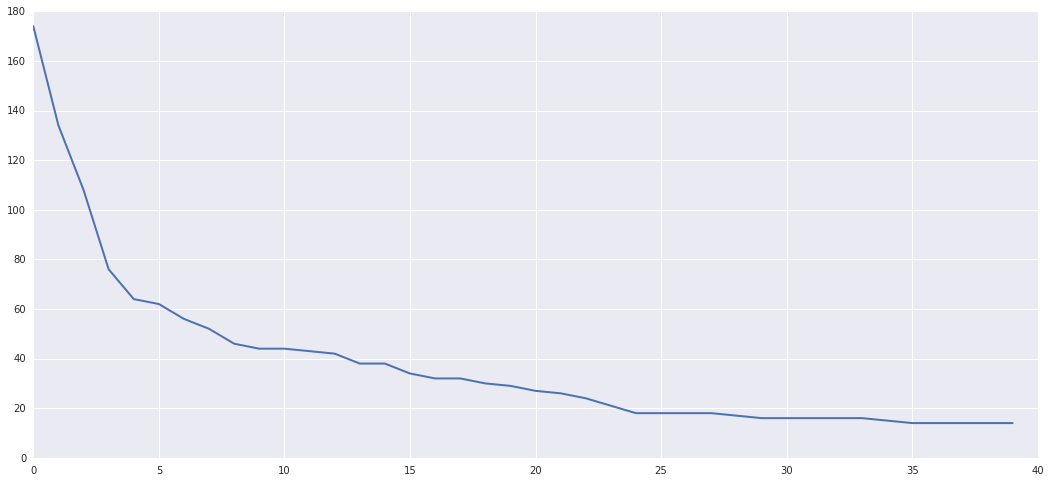

In [80]:
plt.figure(figsize=(18,8))  # set the canvas size
plt.plot(ys, linewidth = 2)    # call a line plt
pass

## Is this chart helpful?

Where are the words??

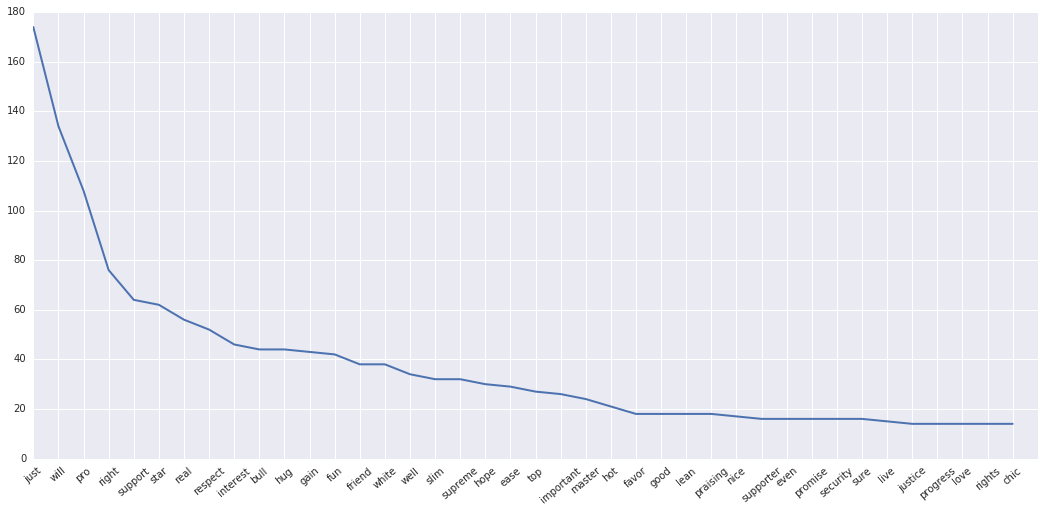

In [90]:
plt.figure(figsize=(18,8))  # set the canvas size
plt.plot(ys, linewidth = 2)    # call a line plt
plt.xticks(range(len(xs)), xs, rotation = 40)
pass

## Distribution of word length

In [91]:
word_length_dict = {}
for tweet in tweets:
    for word in filter(None,tweet.translate(None, punctuation).split(' ')):
        word_length_dict[len(word)] = word_length_dict.get(len(word),0) + 1

In [92]:
word_length_dict

{1: 614,
 2: 3987,
 3: 3940,
 4: 3841,
 5: 3381,
 6: 1992,
 7: 1530,
 8: 1113,
 9: 869,
 10: 406,
 11: 367,
 12: 302,
 13: 133,
 14: 134,
 15: 548,
 16: 15,
 17: 182,
 18: 4,
 19: 7,
 20: 4,
 21: 1,
 22: 1,
 25: 1,
 27: 11,
 30: 5,
 33: 5,
 44: 1}

In [93]:
ys = [v for k, v in word_length_dict.items()]
xs = [k for k, v in word_length_dict.items()]

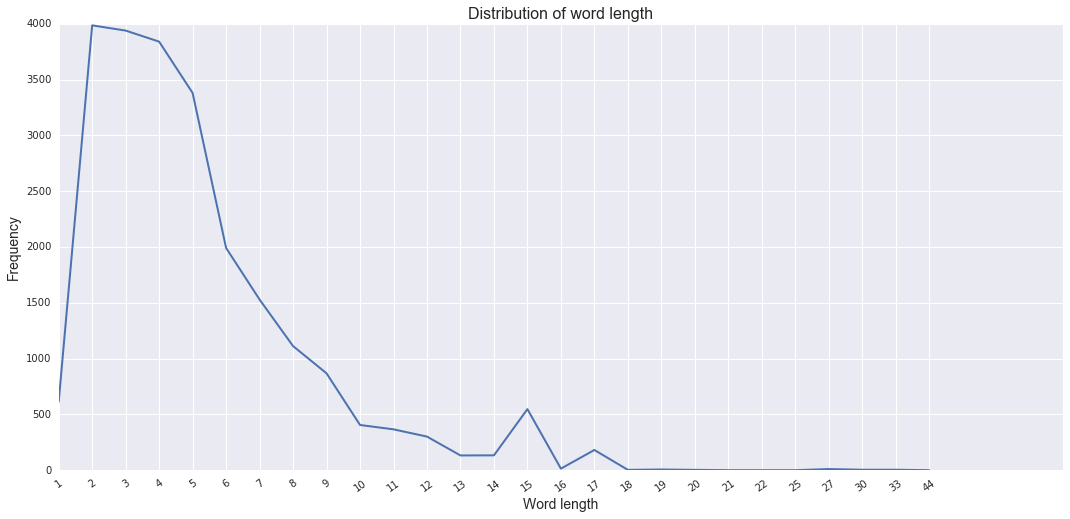

In [94]:
plt.figure(figsize=(18,8))
plt.plot(ys, linewidth=2)
plt.xticks(range(len(xs)), xs,rotation=35)
plt.title("Distribution of word length",size=16)
plt.ylabel("Frequency",size=14)
plt.xlabel("Word length",size=14)
pass

## Anyone notice something strange about the chart?

In [97]:
for i in range(max(word_length_dict.keys())):
    if i not in word_length_dict.keys():
        word_length_dict[i] = 0

In [98]:
word_length_dict

{0: 0,
 1: 614,
 2: 3987,
 3: 3940,
 4: 3841,
 5: 3381,
 6: 1992,
 7: 1530,
 8: 1113,
 9: 869,
 10: 406,
 11: 367,
 12: 302,
 13: 133,
 14: 134,
 15: 548,
 16: 15,
 17: 182,
 18: 4,
 19: 7,
 20: 4,
 21: 1,
 22: 1,
 23: 0,
 24: 0,
 25: 1,
 26: 0,
 27: 11,
 28: 0,
 29: 0,
 30: 5,
 31: 0,
 32: 0,
 33: 5,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 1}

In [99]:
ys = [v for k, v in word_length_dict.items()]
xs = [k for k, v in word_length_dict.items()]

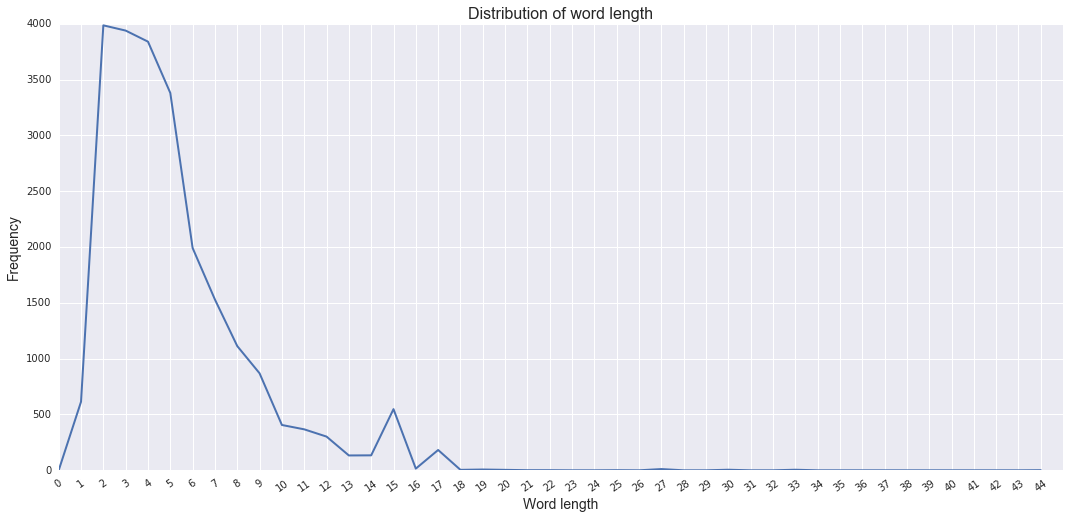

In [100]:
plt.figure(figsize=(18,8))
plt.plot(ys,linewidth=2)
plt.xticks(range(len(xs)), xs,rotation=35)
plt.title("Distribution of word length",size=16)
plt.ylabel("Frequency",size=14)
plt.xlabel("Word length",size=14)
pass

## n-grams

<ul>
<li>Single word counts is ok, but for richer text analysis might want combinations of words
<li>bi-grams, tri-grams, ..., n-grams
</ul>

In [101]:
# example of bi grams of first tweet

tweet = tweets[0].split(' ')
bigrams = []

for i in range(len(tweet)-1): # need to stop 1 element before the end
    bigrams.append((tweet[i], tweet[i+1]))

In [102]:
bigrams

[('Obama', 'has'),
 ('has', 'called'),
 ('called', 'the'),
 ('the', 'GOP'),
 ('GOP', 'budget'),
 ('budget', 'social'),
 ('social', 'Darwinism.'),
 ('Darwinism.', 'Nice'),
 ('Nice', 'try,'),
 ('try,', 'but'),
 ('but', 'they'),
 ('they', 'believe'),
 ('believe', 'in'),
 ('in', 'social'),
 ('social', 'creationism.')]

In [103]:
# example of trigrams of first tweet

tweet = tweets[0].split(' ')
trigrams = []

for i in range(len(tweet)-2):
    trigrams.append((tweet[i], tweet[i+1], tweet[i+2]))

In [104]:
trigrams

[('Obama', 'has', 'called'),
 ('has', 'called', 'the'),
 ('called', 'the', 'GOP'),
 ('the', 'GOP', 'budget'),
 ('GOP', 'budget', 'social'),
 ('budget', 'social', 'Darwinism.'),
 ('social', 'Darwinism.', 'Nice'),
 ('Darwinism.', 'Nice', 'try,'),
 ('Nice', 'try,', 'but'),
 ('try,', 'but', 'they'),
 ('but', 'they', 'believe'),
 ('they', 'believe', 'in'),
 ('believe', 'in', 'social'),
 ('in', 'social', 'creationism.')]

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## EXERCISE TIME

1. Write your own bigram function. Do this without using a for loop. Hint - look up the `zip` function.
2. Do the same for tri grams.

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Take Away

<ul>
<li>Manipulating strings and text analysis
<li>Reading files from the web and local 
<li>Basic plotting
</ul>

Review Problems<a id="hmwk"></a>
====

**Q1**.

Write a function to remove vowels from a string. Stick to base python only.

#### Q2. 
For the next few questions, read in `Through the Looking glass` from Project Gutenberg (`pg12.txt`). 

In [72]:
import os

if not os.path.exists('alice.txt'):
    ! curl http://www.gutenberg.org/cache/epub/12/pg12.txt -O alice.txt        

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  181k  100  181k    0     0   236k      0 --:--:-- --:--:-- --:--:--  236k
<html>
<head><title>301 Moved Permanently</title></head>
<body bgcolor="white">
<center><h1>301 Moved Permanently</h1></center>
<hr><center>nginx</center>
</body>
</html>


In [73]:
poem = open('pg12.txt').read()  # read in file
print poem[:1000]

﻿The Project Gutenberg EBook of Through the Looking-Glass, by
Charles Dodgson                         AKA Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Through the Looking-Glass

Author: Charles Dodgson, AKA Lewis Carroll

Last updated: December 29, 2008
Posting Date: June 25, 2008 [EBook #12]
Release Date: February, 1991

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK THROUGH THE LOOKING-GLASS ***










THROUGH THE LOOKING-GLASS

By Lewis Carroll


The Millennium Fulcrum Edition 1.7




CHAPTER I. Looking-Glass house

One thing was certain, that the WHITE kitten had had nothing to do with
it:--it was the black kitten's fault entirely. For the white kitten had
been having its face washed by the old


**A)**. Print the subset starting from `'JABBERWOCKY'` and ending with `'It seems very pretty.'`

**B)**. Print all *distinct* palindromic words, if any. Remember to 'standardize' first.

**C)**. Find all possible sequences of 3 words in the poem. This is called a trigram. (Hint: use `zip` or `islice` from `itertools`)

**Q3**.

Plot a similar distribution for the positive word count. The differences are:

<ul>
<li>Plot top 30 positive words only
<li>Change the figure size
<li>Change the rotation of the xticks
<li>Change the linewidth and color
</ul>

Feel free to use the existing code as a template.<br>

As an extra challenge, instead of plotting the count of each positive word in ascending order, plot the cumulative count of the positive words, as a % of the total count of positive words, for the first 30. Your chart should look something like this:

<img id="cumulative" src="../images/cumulative.png"/>




# BONUS QUESTION!

**Q1**. Encode and decode `Through the Looking Glass` using a [Caesar cipher](https://en.wikipedia.org/wiki/Caesar_cipher) <br>

Hint: create a function `encode(poem, shift)` where `shift` is the number of characters used to encode the cipher. It should return the encoded poem. Can you also use this function to return the decoded cipher? Check out the `maketrans` function in `string`